In [2]:
# %pip install openpyxl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from sklearn.metrics import r2_score 

In [3]:
df = pd.read_excel("ANN_amox/Semibat_convertido_clean.xlsx")
df.columns = ['Ester_t','Ester_gl','Ester_mM','Amox_t','Amox_gl','Amox_mM','APA_t','APA_gl','APA_mM','POHPG_t','POHPG_gl','POHPG_mM']
df

,Ester_t,Ester_gl,Ester_mM,Amox_t,Amox_gl,Amox_mM,APA_t,APA_gl,APA_mM,POHPG_t,POHPG_gl,POHPG_mM
0,9.859813,6.133333,34.040034,14.719626,0.883436,2.417722,10.163551,15.409471,71.254373,15.070093,-0.024540,-0.146805
1,20.017523,5.866667,32.560033,29.906542,1.262440,3.454954,19.976636,15.186630,70.223941,29.789720,0.368098,2.202071
2,29.827687,5.733333,31.820032,39.953271,1.546012,4.231013,30.140187,15.008357,69.399596,39.953271,0.417178,2.495680
3,39.986371,5.511111,30.586697,59.929907,2.110429,5.775669,39.953271,15.498607,71.666546,59.929907,0.736196,4.404142
4,50.145055,5.288889,29.353363,85.864486,2.797546,7.656119,49.766355,15.320334,70.842200,86.214953,0.073620,0.440414
5,59.973715,6.000000,33.300033,103.037383,3.067485,8.394868,59.929907,15.186630,70.223941,103.037383,1.079755,6.459408
6,70.132399,5.777778,32.066699,112.149533,3.042945,8.327709,69.742991,15.008357,69.399596,111.799065,0.858896,5.138165
7,80.292056,5.600000,31.080031,141.939252,3.558282,9.738047,79.906542,15.498607,71.666546,142.289720,0.809816,4.844556
8,90.103193,5.511111,30.586697,155.257009,3.975460,10.879749,90.070093,15.364903,71.048287,155.257009,1.055215,6.312603
9,100.261877,5.288889,29.353363,181.191589,4.073620,11.148384,100.233645,15.186630,70.223941,181.542056,1.128834,6.753017


In [60]:
CAB_medida  = df.loc[:,'Ester_mM'].dropna().to_numpy()
CAN_medida = df.loc[:,'Amox_mM'].dropna().to_numpy()
CNH_medida = df.loc[:,'APA_mM'].dropna().to_numpy()
CAOH_medida = df.loc[:,'POHPG_mM'].dropna().to_numpy()
t_cab = df.loc[:,'Ester_t'].dropna().to_numpy().round(0)
t_can = df.loc[:,'Amox_t'].dropna().to_numpy().round(0)
t_cnh = df.loc[:,'APA_t'].dropna().to_numpy().round(0)
t_caoh = df.loc[:,'POHPG_t'].dropna().to_numpy().round(0)
tempo_substratos = t_cab
tempo_produtos = t_can
CAB_medida_t = np.hstack([CAB_medida.reshape(-1,1),t_cab.reshape(-1,1)])
CAN_medida_t = np.hstack([CAN_medida.reshape(-1,1),t_can.reshape(-1,1)])
CNH_medida_t = np.hstack([CNH_medida.reshape(-1,1),t_cab.reshape(-1,1)])
CAOH_medida_t = np.hstack([CAOH_medida.reshape(-1,1),t_can.reshape(-1,1)])
medidas_exp_list = [CAB_medida_t,CAN_medida_t,CNH_medida_t,CAOH_medida_t]
t = np.unique(np.sort(np.hstack([t_can,t_cab])))


In [9]:
fed_ab = np.array([5,10,15,21])

fed_ab_t = np.array([t_cab[fed_ab[0]],
                     t_cab[fed_ab[1]],
                     t_cab[fed_ab[2]],
                     t_cab[fed_ab[3]]])

fed_ab_c = np.array([CAB_medida[fed_ab[0]],
                     CAB_medida[fed_ab[1]],
                     CAB_medida[fed_ab[2]],
                     CAB_medida[fed_ab[3]]])
fed_ab = np.vstack([fed_ab_t,fed_ab_c])

fed_nh = np.array([3,7,11,16,21])

fed_nh_t = np.array([t_cnh[fed_nh[0]],
                     t_cnh[fed_nh[1]],
                     t_cnh[fed_nh[2]],
                     t_cnh[fed_nh[3]],
                     t_cnh[fed_nh[4]],
                     ])
fed_nh_c = np.array([CNH_medida[fed_nh[0]],
                     CNH_medida[fed_nh[1]],
                     CNH_medida[fed_nh[2]],
                     CNH_medida[fed_nh[3]],
                     CNH_medida[fed_nh[4]]])
fed_nh = np.vstack([fed_nh_t,fed_nh_c])

print(fed_nh)

[[ 40.          80.         120.         170.         220.        ]
 [ 71.66654602  71.66654602  71.87263242  71.66654602  72.28480522]]


In [10]:
def enzymic_amox(t, y, kcat1, kcat2, Km1, Km2, Tmax, Ken, kAB, kAN, kAOH, kNH):
    FAB = 0
    FNH = 0 

    CAB = y[0]
    CAN = y[1]
    CNH = y[2]
    CAOH = y[3]

    Cez = 1  # Assuming a constant value for Cez if not provided

    # Consumo de ester
    VAB = (kcat1 * CAB * Cez) / ((Km1 * (1 + (CAN/kAN) + (CAOH/kAOH))) + CAB)
    
    # Hidrolise de amoxicilina
    VAN = (kcat2 * CAN * Cez) / ((Km2 * (1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + CAN)
    
    # Enzima saturada com 6-apa
    X = CNH / (Ken + CNH)
    
    # Sintese enzimatica
    VS = VAB * Tmax * X

    # Hidrolise de ester
    Vh1 = (VAB - VS) 

    dy = np.zeros(4)

    # C. ester
    dy[0] = (-(VS - VAN) - (Vh1 + VAN)) + FAB 
    
    # C. amox
    dy[1] = VS - VAN                        
    
    # C. 6-apa
    dy[2] = -(VS - VAN) + FNH                
    
    # C. POHPG
    dy[3] = Vh1 + VAN
    
    return dy


In [11]:
fed_ab = np.array([5,10,15,21])

fed_ab_t = np.array([t_cab[fed_ab[0]],
                     t_cab[fed_ab[1]],
                     t_cab[fed_ab[2]],
                     t_cab[fed_ab[3]]])

fed_ab_c = np.array([CAB_medida[fed_ab[0]],
                     CAB_medida[fed_ab[1]],
                     CAB_medida[fed_ab[2]],
                     CAB_medida[fed_ab[3]]])
fed_ab = np.vstack([fed_ab_t,fed_ab_c])

fed_nh = np.array([3,7,11,16,21])

fed_nh_t = np.array([t_cnh[fed_nh[0]],
                     t_cnh[fed_nh[1]],
                     t_cnh[fed_nh[2]],
                     t_cnh[fed_nh[3]],
                     t_cnh[fed_nh[4]],
                     ])
fed_nh_c = np.array([CNH_medida[fed_nh[0]],
                     CNH_medida[fed_nh[1]],
                     CNH_medida[fed_nh[2]],
                     CNH_medida[fed_nh[3]],
                     CNH_medida[fed_nh[4]]])
fed_nh = np.vstack([fed_nh_t,fed_nh_c])

print(fed_nh)

[[ 40.          80.         120.         170.         220.        ]
 [ 71.66654602  71.66654602  71.87263242  71.66654602  72.28480522]]


In [85]:
kcat1        = 0.181
kcat2        = 0.395
Km1          = 5.449
Km2          = 1.694
Tmax         = 0.824
Ken          = 7.947
kAB          = 0.682
kAN          = 1.989
kAOH         = 9.856
kNH          = 9.763

P = np.zeros(10)
P[0]   = kcat1    
P[1]   = kcat2    
P[2]   = Km1      
P[3]   = Km2      
P[4]   = Tmax     
P[5]   = Ken      
P[6]   = kAB      
P[7]   = kAN      
P[8]   = kAOH     
P[9]  = kNH 
Np = len(P)



In [22]:
def ode15s_amox_fed(P,t):
    fed_t = np.unique(np.sort(np.hstack([fed_ab[0],fed_nh[0]])))
    CI_ode = np.array([CAB_medida[0],CAN_medida[0],CNH_medida[0],CAOH_medida[0]])
    all_t = []
    for i,fed in enumerate(fed_t):
        all_t.insert(i,[])
        count = 0
        for p in t:
            all_t[i].append(p)
            count += 1
            if p == fed:
                break
        t = t[count-1:]
    all_t.append(t)

    final_Y = np.zeros([4,1])
    for t in all_t:
        Y = scipy.integrate.solve_ivp(enzymic_amox,t_span=(t[0],t[-1]),t_eval=t,y0=CI_ode,method='BDF',args=P)
        Y = Y.y
        CI_ode = Y[:,-1]
        if t[-1] in fed_ab[0]:
            CI_ode[0] = fed_ab[1][list(fed_ab[0]).index(t[-1])]
        if t[-1] in fed_nh[0]:
            CI_ode[2] = fed_nh[1][list(fed_nh[0]).index(t[-1])]
        final_Y = np.hstack([final_Y,Y[:,:-1]]) 
    final_Y = np.hstack([final_Y,Y[:,-1].reshape(-1,1)])
    final_Y = np.delete(final_Y,0,1)
    return final_Y

In [94]:
def calculate_error(model_matrix, experimental_data_list):
    # Extract model time points
    model_time = model_matrix[:, -1]
    total_error = 0
    for var_index, experimental_data in enumerate(experimental_data_list):
        # Extract variable model data
        model_variable_data = model_matrix[:, var_index]
        # Match time points between model and experimental data
        exp_time = experimental_data[:, -1]
        exp_values = experimental_data[:, 0]

        for t, exp_value in zip(exp_time, exp_values):
            if not np.isnan(exp_value):  # Skip NaN values in experimental data
                # Find corresponding model value at time t
                model_value = model_variable_data[model_time == t]
                if model_value.size > 0:  # If there's a matching time point
                    total_error += (exp_value - model_value[0]) ** 2
    print(total_error)
    return total_error

In [90]:
def objective_function(params):
    kcat1, kcat2, Km1, Km2, Tmax, Ken, kAB, kAN, kAOH, kNH = params
    print("Solving")
    sol = ode15s_amox_fed(params,t)
    model_output = sol.T

    model_output = np.hstack([model_output,t.reshape(-1,1)])
    return calculate_error(model_output,medidas_exp_list)


In [92]:
print(objective_function(P))

Solving
116.05397500402006


In [103]:
options = {'maxiter': 50}
result = minimize(objective_function, P, method='L-BFGS-B',options=options)

# Optimized parameters
optimized_parameters = result.x
print("Optimized Parameters:", optimized_parameters)
P_new = optimized_parameters

Solving
116.05397500402006
Solving
116.05396810515875
Solving
116.05398234245725
Solving
116.05397513853718
Solving
116.05397344396144
Solving
116.05396785604059
Solving
116.05397507865548
Solving
116.0539782388044
Solving
116.05397473687576
Solving
116.05397499630494
Solving
116.05397503998583
Solving
23511.66237295974
Solving
23511.662773581516
Solving
23511.661923890668
Solving
23511.66233370994
Solving
23511.662339595583
Solving
23511.66274863054
Solving
23511.662364667172
Solving
23511.66250043673
Solving
23511.66247164958
Solving
23511.662374495932
Solving
23511.66237327518
Solving
77.62710193376891
Solving
77.62710756226667
Solving
77.6271075471053
Solving
77.6271018585466
Solving
77.62710083727498
Solving
77.62709679204491
Solving
77.6271019892103
Solving
77.62710425719519
Solving
77.62710207646353
Solving
77.62710193603358
Solving
77.62710195883815
Solving
52.650400900118804
Solving
52.65040538966064
Solving
52.65040137197992
Solving
52.65040083791776
Solving
52.65040082613167

In [107]:
sol = ode15s_amox_fed(P_new,t)
print(sol)
CAB  = sol[0]
CAN  = sol[1] 
CNH  = sol[2]
CAOH = sol[3]


[[34.04003404 33.46870788 32.9021597  31.78382478 30.68549103 29.60865287
  33.3000333  32.23333998 31.1844392  30.5649218  30.15565259 29.14519519
  28.84562262 33.54670021 33.3429542  32.53398175 31.53879363 30.56041214
  30.36674521 29.59877531 29.12436489 34.04003404 33.07068196 32.11759415
  32.02317682 31.18013617 31.08724015 30.2581525  29.35182723 29.08309026
  34.04003404 33.76229715 33.11848299 32.21149671 31.31877829 30.44040405
  29.92050141 29.57688036 29.06589018]
 [ 2.4177219   2.75229483  3.08212201  3.72708923  4.35211992  4.95799873
   5.54407597  6.13512737  6.70816915  7.04341577  7.26310075  7.79935241
   7.9565982   8.31688856  8.42491809  8.85086547  9.36905617  9.8698701
   9.96795838 10.35339649 10.58852592 10.81913718 11.30677086 11.77956491
  11.82591318 12.23596802 12.28071803 12.67616344 13.09993846 13.22373919
  13.50670485 13.63977359 13.94579445 14.3694392  14.77795635 15.17127953
  15.39968573 15.54877851 15.76768753]
 [71.25437322 70.91980029 70.589973

Text(0, 0.5, 'mM')

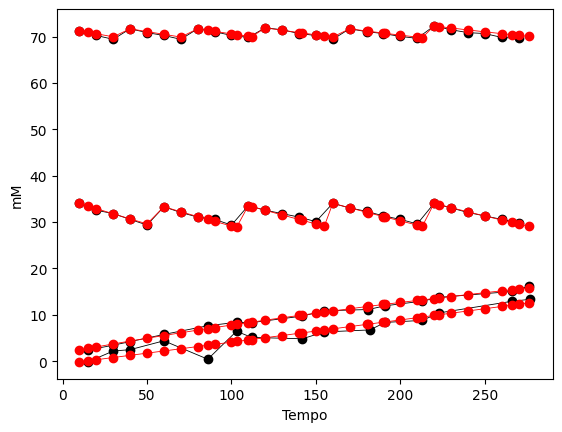

In [109]:

fig = plt.figure()
plt.plot(t_cab, CAB_medida,'-ok',linewidth=0.6)
plt.plot(t_can, CAN_medida,'-ok',linewidth=0.6)
plt.plot(t_cnh, CNH_medida,'-ok',linewidth=0.6)
plt.plot(t_caoh,CAOH_medida,'-ok',linewidth=0.6)
plt.plot(t, CAB,'-or',linewidth=0.6)
plt.plot(t, CAN,'-or',linewidth=0.6)
plt.plot(t, CNH,'-or',linewidth=0.6)
plt.plot(t, CAOH,'-or',linewidth=0.6)
plt.xlabel('Tempo')
plt.ylabel('mM')

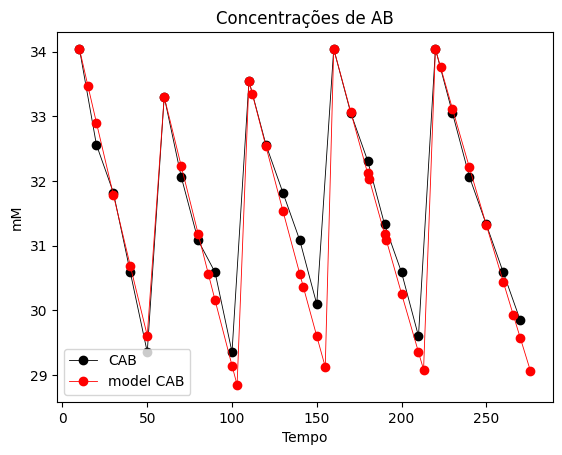

In [113]:
fig = plt.figure()
plt.plot(t_cab, CAB_medida,'-ok',linewidth=0.6)
plt.plot(t, CAB,'-or',linewidth=0.6)
plt.title(f'Concentrações de AB')
plt.legend(['CAB','model CAB'])
plt.xlabel('Tempo')
plt.ylabel('mM');

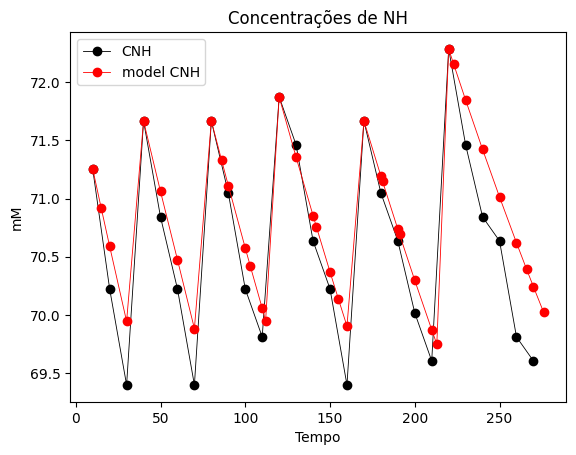

In [115]:
fig = plt.figure()
plt.plot(t_cnh, CNH_medida,'-ok',linewidth=0.6)
plt.plot(t, CNH,'-or',linewidth=0.6)
plt.title(f'Concentrações de NH')
plt.legend(['CNH','model CNH']);
plt.xlabel('Tempo')
plt.ylabel('mM');

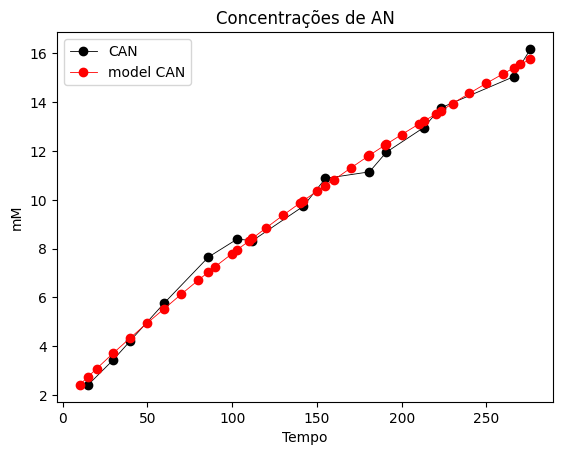

In [116]:
fig = plt.figure()

plt.plot(t_can, CAN_medida,'-ok',linewidth=0.6)
plt.plot(t, CAN,'-or',linewidth=0.6)
plt.title(f'Concentrações de AN')
plt.legend(['CAN','model CAN']);
plt.xlabel('Tempo')
plt.ylabel('mM');

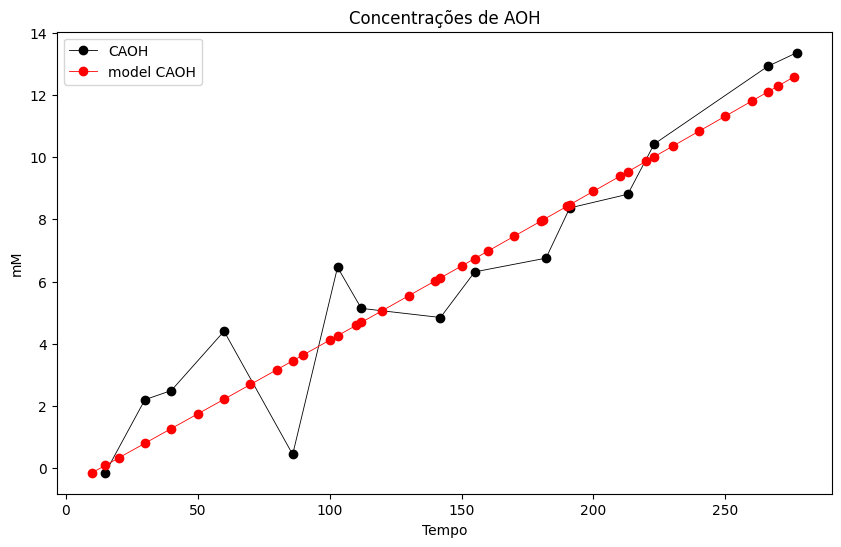

In [119]:
fig = plt.figure(figsize=(10,6))

plt.plot(t_caoh,CAOH_medida,'-ok',linewidth=0.6)
plt.plot(t, CAOH,'-or',linewidth=0.6)
plt.title(f'Concentrações de AOH')
plt.legend(['CAOH','model CAOH'])
plt.xlabel('Tempo')
plt.ylabel('mM');